In [22]:
import pandas as pd
# Load dataset

data = pd.read_csv('data_cleanFil1.csv')
data = data.dropna()

import advertools as adv
# stopwords

my_stopwords = list(adv.stopwords['tagalog'])
my_stopwords.extend(list(adv.stopwords['english']))
my_stopwords.extend(['yung','lang','naman','po','seller','order','sana','ung','sya'])


In [23]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  4085
Number of columns:  2


In [24]:

# Count the number of positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Print the results
print(sentiment_counts)

negative    2191
positive    1894
Name: sentiment, dtype: int64


# 3 MACHINE LEARNING

SPLIT DATASET

In [25]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['review'], data['sentiment'], test_size=0.3, random_state=42)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Create a CountVectorizer object to convert text to numerical features
vectorizer = TfidfVectorizer(stop_words=my_stopwords)

# Transform the text data into numerical features
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

NAIVE BAYES

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


# Create a MultinomialNB object
nb = MultinomialNB()
# Fit the MultinomialNB model on the training data
nb.fit(X_train, y_train)
# Make predictions on the validation data using the MultinomialNB model
y_pred = nb.predict(X_val)
# Calculate the accuracy, precision, recall, and F1 score of the MultinomialNB model on the validation data
report = classification_report(y_val, y_pred)
print(f'Naive Bayes Classification Report: \n{report}')

nb_accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {nb_accuracy}')

Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.90      0.93      0.91       650
    positive       0.92      0.88      0.90       576

    accuracy                           0.91      1226
   macro avg       0.91      0.90      0.90      1226
weighted avg       0.91      0.91      0.91      1226

Accuracy: 0.9053833605220228


SVM

In [28]:
from sklearn import svm

# Create an SVM object and fit the model to the training data
clf = svm.SVC()
clf.fit(X_train, y_train)

# Use the trained SVM model to make predictions on the validation data
y_pred_svm = clf.predict(X_val)

# Calculate the performance metrics for the SVM model
report_svm = classification_report(y_val, y_pred_svm)
print(f'SVM Classification Report: \n{report_svm}')
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'Accuracy: {svm_accuracy}')

SVM Classification Report: 
              precision    recall  f1-score   support

    negative       0.87      0.94      0.90       650
    positive       0.93      0.84      0.88       576

    accuracy                           0.89      1226
   macro avg       0.90      0.89      0.89      1226
weighted avg       0.90      0.89      0.89      1226

Accuracy: 0.8947797716150081


Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest object and fit the model to the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Use the trained Random Forest model to make predictions on the validation data
y_pred_rf = rfc.predict(X_val)

# Calculate the performance metrics for the Random Forest model
report_rf = classification_report(y_val, y_pred_rf)
print(f'Random Forest Classification Report: \n{report_rf}')
rfc_accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {rfc_accuracy}')

Random Forest Classification Report: 
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89       650
    positive       0.89      0.84      0.87       576

    accuracy                           0.88      1226
   macro avg       0.88      0.88      0.88      1226
weighted avg       0.88      0.88      0.88      1226

Accuracy: 0.8784665579119086


FINE TUNING

In [30]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Choose an appropriate performance metric
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average='weighted'), 'recall': make_scorer(recall_score, average='weighted'), 'f1': make_scorer(f1_score, average='weighted')}


# Create a GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(nb, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)

# Fit the GridSearchCV object to the training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding scores
print('Best parameters:', grid_search.best_params_)
print('Best scores:', grid_search.best_score_)

# Train the model on the entire training set using the best hyperparameters
nbHyperTuning = MultinomialNB(alpha=1.0)
nbHyperTuning.fit(X_train, y_train)

y_pred = nbHyperTuning.predict(X_val)

reportHyperTuning = classification_report(y_val, y_pred)
print(f'Naive Bayes Classification Report: \n{reportHyperTuning}')

nbHT_accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {nbHT_accuracy}')



Best parameters: {'alpha': 1.0}
Best scores: 0.8852816185565746
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.90      0.93      0.91       650
    positive       0.92      0.88      0.90       576

    accuracy                           0.91      1226
   macro avg       0.91      0.90      0.90      1226
weighted avg       0.91      0.91      0.91      1226

Accuracy: 0.9053833605220228


Sample Sentence

In [31]:

# Define a sample sentence
sentence = "manipis"

# Transform the sentence into numerical features using the same vectorizer object
X_sentence = vectorizer.transform([sentence])

# Use the trained MultinomialNB model to predict the sentiment of the sentence
sentiment = nbHyperTuning.predict(X_sentence)

print(f"Sentence: {sentence}")
print(f"Predicted sentiment: {sentiment[0]}")

Sentence: manipis
Predicted sentiment: negative


# DATAFRAME

In [32]:
df = pd.DataFrame({
    'Model': ['Naive Bayes HT', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy': [nbHT_accuracy, nb_accuracy, svm_accuracy, rfc_accuracy]
})

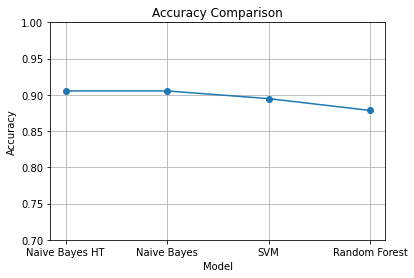

In [33]:
import matplotlib.pyplot as plt

plt.plot(df['Model'], df['Accuracy'], marker='o')
plt.ylim([0.7,1])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.show()

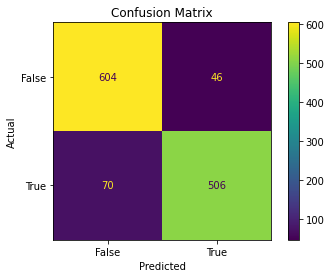

In [34]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Define the sentence to test
sentence = "maganda fast delivery"

# Fit the vectorizer on your dataset
vectorizer.fit(data['review'])

# Transform the sentence into a tf-idf vector
sentence_vector = vectorizer.transform([sentence])

# Get the vocabulary of the vectorizer
vocab = vectorizer.get_feature_names()

# Create a dictionary to store the tf, idf, and tf-idf values for each feature in the sentence
values = {'feature': [], 'tf': [], 'idf': [], 'tf-idf': []}

# Loop through each feature in the sentence and get its tf, idf, and tf-idf values
for feature in sentence.split():
    # Get the index of the feature in the vocabulary
    index = vocab.index(feature)
    # Get the tf value of the feature in the sentence vector
    tf = sentence_vector[0, index]
    # Get the idf value of the feature from the idf array
    idf = vectorizer.idf_[index]
    # Calculate the tf-idf value of the feature
    tf_idf = tf * idf
    # Add the values to the dictionary
    values['feature'].append(feature)
    values['tf'].append(tf)
    values['idf'].append(idf)
    values['tf-idf'].append(tf_idf)

# Convert the dictionary to a pandas DataFrame and print it
import pandas as pd
df = pd.DataFrame(values)
print(df)


    feature        tf       idf    tf-idf
0   maganda  0.494713  3.645441  1.803446
1      fast  0.650517  4.793533  3.118276
2  delivery  0.576270  4.246418  2.447082


c:\Users\Maike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


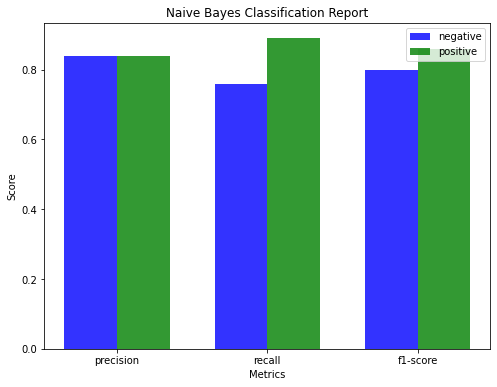

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# create a numpy array of the precision, recall, and f1-score values for negative and positive classes
metrics = np.array([[0.84, 0.76, 0.80], [0.84, 0.89, 0.86]])

# create a bar plot for the metrics
fig, ax = plt.subplots(figsize=(8, 6))
x_labels = ['precision', 'recall', 'f1-score']
x_ticks = np.arange(len(x_labels))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x_ticks - bar_width/2, metrics[0], bar_width, alpha=opacity, color='b', label='negative')
rects2 = ax.bar(x_ticks + bar_width/2, metrics[1], bar_width, alpha=opacity, color='g', label='positive')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Naive Bayes Classification Report')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.legend()

# display the plot
plt.show()

In [37]:
# Count the number of occurrences of each class in the training data
class_counts = data["sentiment"].value_counts()

# Compute the total number of training instances
total_count = class_counts.sum()

# Compute the prior probability of each class
prior_probs = class_counts / total_count

print("Prior probability of positive sentiment:", prior_probs["positive"])
print("Prior probability of negative sentiment:", prior_probs["negative"])

Prior probability of positive sentiment: 0.46364749082007345
Prior probability of negative sentiment: 0.5363525091799266


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

data = pd.read_csv('data_clean.csv')
data = data.dropna()

# Split dataset into positive and negative classes
positive_data = data[data['sentiment'] == 'positive']
negative_data = data[data['sentiment'] == 'negative']


# Create tf-idf vectorizer for positive class
tfidf_pos = TfidfVectorizer()
tfidf_pos.fit(positive_data['review'])

# Create tf-idf vectorizer for negative class
tfidf_neg = TfidfVectorizer()
tfidf_neg.fit(negative_data['review'])

# Compute tf-idf scores for the phrase "hindi na ako bibili nito" in the positive class
phrase = "manipis"
pos_tfidf_scores = {}
for word in phrase.split():
    if word in tfidf_pos.vocabulary_:
        pos_tfidf_scores[word] = tfidf_pos.idf_[tfidf_pos.vocabulary_[word]]

# Compute tf-idf scores for the phrase "hindi na ako bibili nito" in the negative class
neg_tfidf_scores = {}
for word in phrase.split():
    if word in tfidf_neg.vocabulary_:
        neg_tfidf_scores[word] = tfidf_neg.idf_[tfidf_neg.vocabulary_[word]]

# Print tf-idf scores
print("TF-IDF scores for \"{}\" in the positive class:".format(phrase))
print(pos_tfidf_scores)

print("TF-IDF scores for \"{}\" in the negative class:".format(phrase))
print(neg_tfidf_scores)

TF-IDF scores for "manipis" in the positive class:
{'manipis': 7.303049824523651}
TF-IDF scores for "manipis" in the negative class:
{'manipis': 5.591354253781028}


In [44]:
import nltk

# Example documents in the negative and positive class
neg_docs = data[data['sentiment'] == 'negative']['review'].tolist()
pos_docs = data[data['sentiment'] == 'positive']['review'].tolist()

# Initialize two empty sets to store the unique words in the negative and positive class
neg_words = set()
pos_words = set()

# Loop through all the documents in the negative and positive class and tokenize them using nltk's word_tokenize
for doc in neg_docs:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        neg_words.add(token.lower())

for doc in pos_docs:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        pos_words.add(token.lower())

# Sum the length of each set to get the total number of unique words in the negative and positive class
total_neg_words = len(neg_words)
total_pos_words = len(pos_words)

print("Total unique words in negative class:", total_neg_words)
print("Total unique words in positive class:", total_pos_words)

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)